In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/taxi_fare/train.csv')

In [3]:
df.head()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [5]:
df.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [6]:
df.shape

(209673, 8)

# Data Visualization

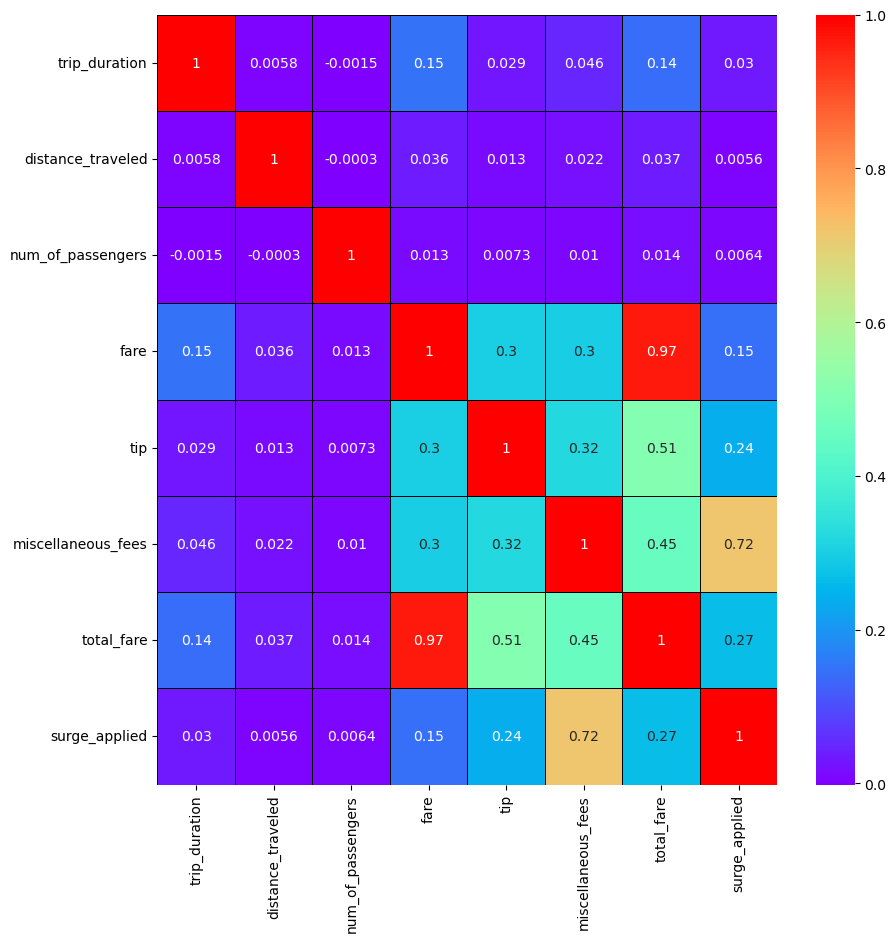

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap='rainbow', linecolor='black', linewidths=0.5, annot=True)
plt.show()

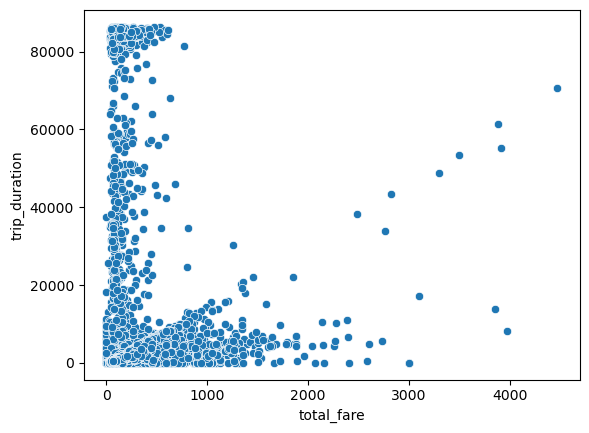

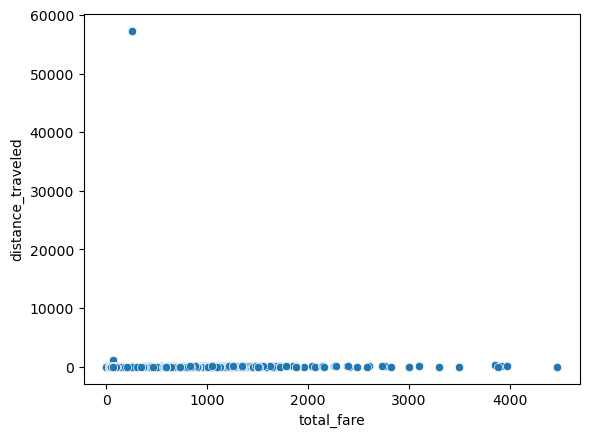

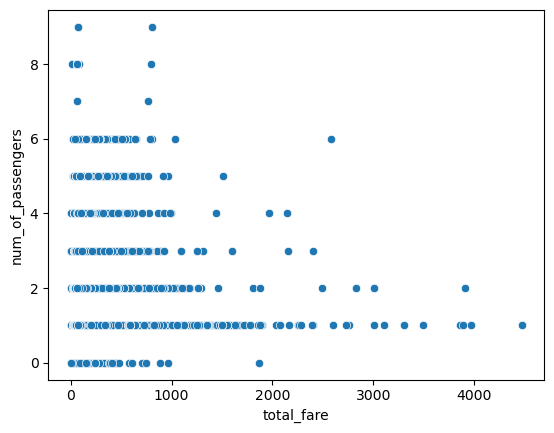

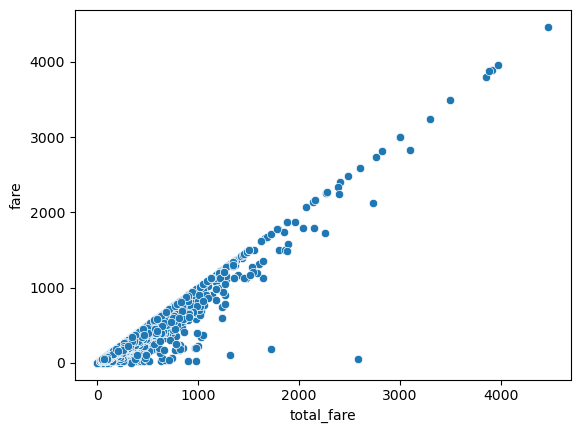

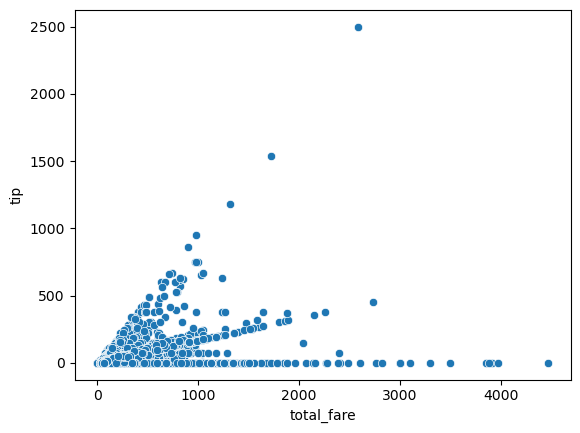

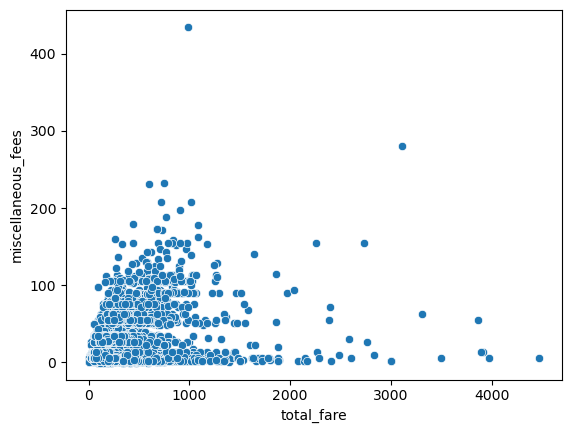

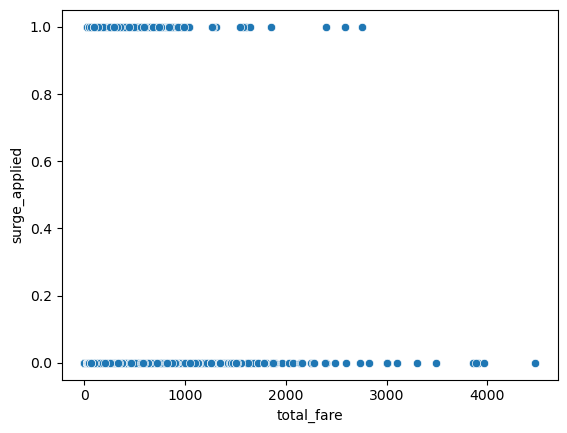

In [13]:
for col in df.columns:
    if col != 'total_fare':
        sns.scatterplot(x=df['total_fare'], y=df[col])
        plt.show()

# Train & Test Split

In [20]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(columns='total_fare')
X

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,0
2,730.0,3.12,1.0,71.25,0,26.625,1
3,671.0,5.63,3.0,90.00,0,9.750,0
4,329.0,2.09,1.0,45.00,12,13.200,0
...,...,...,...,...,...,...,...
209668,1617.0,8.42,1.0,150.00,47,5.800,0
209669,438.0,1.29,1.0,48.75,12,34.575,1
209670,571.0,2.82,1.0,63.75,0,6.000,0
209671,491.0,2.16,1.0,56.25,0,13.500,0


In [25]:
y = df['total_fare']
y

0         105.300
1         142.200
2          97.875
3          99.750
4          70.200
           ...   
209668    202.800
209669     95.325
209670     69.750
209671     69.750
209672    339.750
Name: total_fare, Length: 209673, dtype: float64

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling

In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
STD = StandardScaler()

In [36]:
X_train_SD = STD.fit_transform(X_train)
X_test_SD = STD.transform(X_test)

# Model Training

In [56]:
from sklearn.linear_model import LinearRegression

In [57]:
LR = LinearRegression()

In [58]:
LR.fit(X_train_SD, y_train)

LinearRegression()

In [59]:
y_hat = LR.predict(X_test_SD)

   # Model Evaluation

In [60]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [61]:
print("mse: ", mean_squared_error(y_hat, y_test))

mse:  2.9810390763858436e-25


In [62]:
print("mae: ", mean_absolute_error(y_hat, y_test))

mae:  1.232475007283621e-13


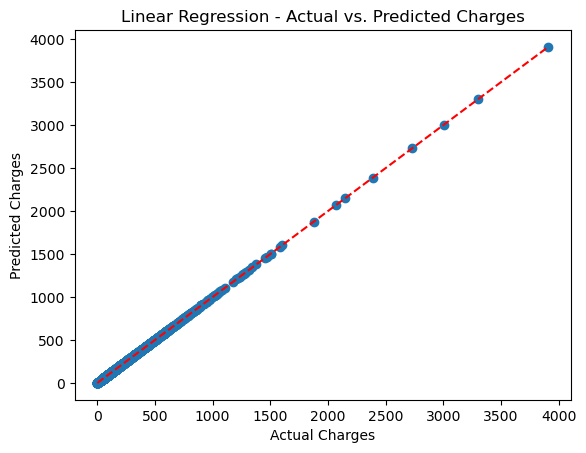

In [63]:
plt.scatter(y_test, y_hat)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Linear Regression - Actual vs. Predicted Charges')
plt.show()